<h1 style="background-color:orange;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">BANK CHURN PREDICTION</h1>


<center><img src="credit.jpg" style="border: 5px solid black; width:800px;height:400px;" /></center>
In this project, I will be performing an classification of data on the customer's records from a bank database.The aim of this project is to identify key factors contributing to customer attrition in a consumer credit card portfolio and to develop a classification model that can accurately predict customers who are likely to churn.Customer churn is a critical concern for the business, as acquiring new customers is significantly more costly than retaining existing ones. By understanding the patterns and behaviors that lead to attrition, the business can proactively intervene and improve customer retention.


<h1 style="background-color:orange;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>

* [1. Introduction](#1)
    * [1.1 Libraries And Utilities](#1.1)
    * [1.2 Data Loading](#1.2)
* [2. Exploratory Data Analysis(EDA)](#2)
* [3. Data Preprocessing](#3)
    * [3.1 Data Upsampling Using SMOTE](#3.1)
    * [3.2 Principal Component Analysis Of One Hot Encoded Data](#3.2)  
* [4. Model Selection And Evaluation](#4) 
* [5. Results](#5) 

<a id="1.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h3>

In [133]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve
import seaborn as sns
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

<a id="1.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Data Loading</h3>

In [134]:
data = pd.read_csv('BankChurners.csv.zip')
data = data[data.columns[:-2]]
data.head()
data.shape

(10127, 21)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">About data</h3>

#### The data set includes information about:

**Customers who Attired** – the column is called Churn

**Services that each customer using** – Type of credit Card , Total no. of products held by the customer.

**Customer credit  information** - how long they’ve been a customer, No. of months inactive in the last 12 months, Credit Limit on the Credit Card, Total Revolving Balance on the Credit Card, Open to Buy Credit Line (Average of last 12 months), Total Transaction Amount ,Total Transaction Count and Average Card Utilization Ratio.

**Demographic info about customers** – gender,income range, age, and if they have partners and dependents

here our data contains no missing value.and demogrophic columns are categorical.as our data is clean there is only need to perform encoding of categorical variable . and standerdizing numerical values

<a id="2"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h1>


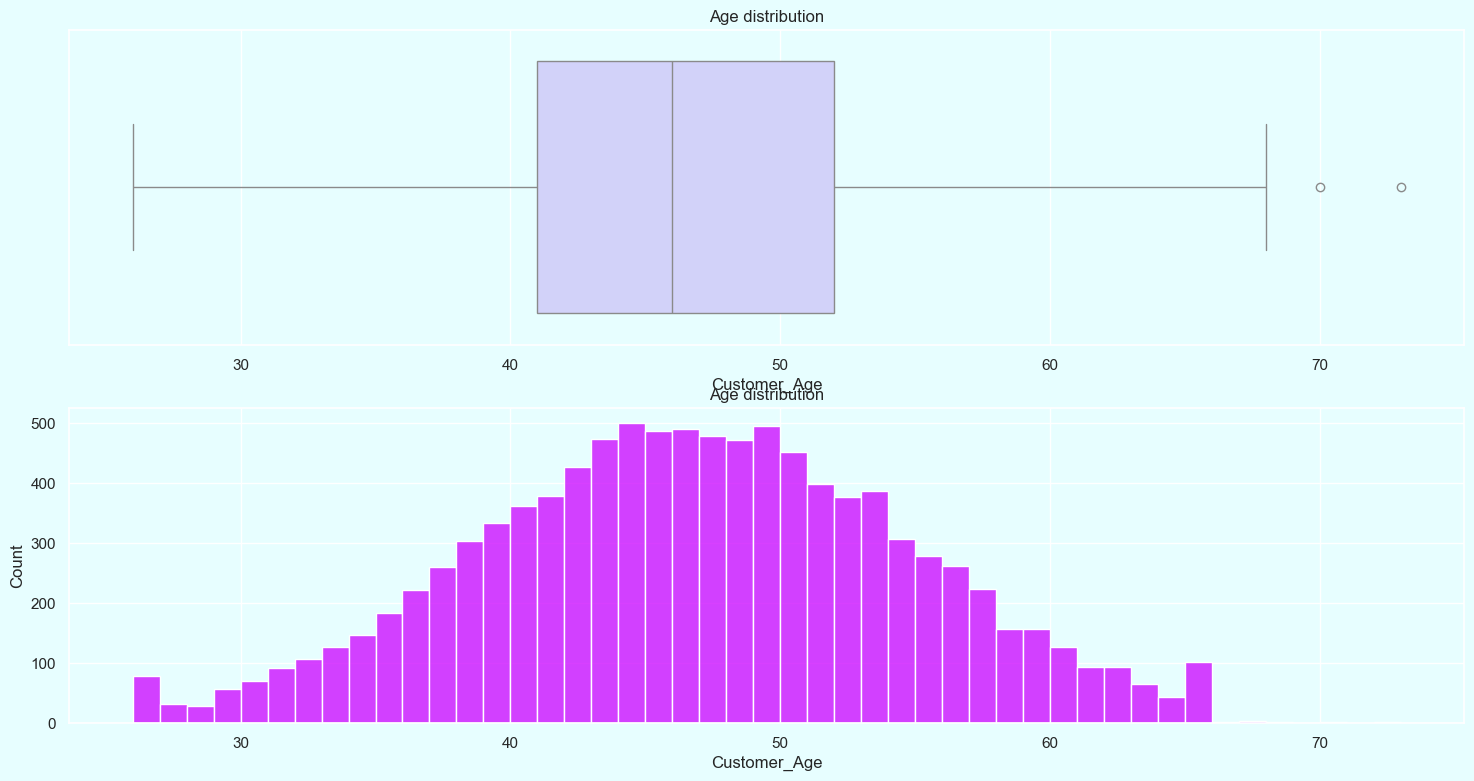

In [136]:
sns.set(rc= {"axes.facecolor" :'#e7feff',"figure.facecolor":'#e7feff'
            })
f,ax=plt.subplots(2,1,figsize=(18,9))

ax1,ax2=ax.ravel()
tr1=sns.boxplot(x=data['Customer_Age'],ax=ax1,color='#ccccff')
ax1.set_title('Age distribution')
tr2=sns.histplot(x=data['Customer_Age'],ax=ax2,color='#cc00ff')
ax2.set_title('Age distribution')
plt.grid(True)

We can see that the distribution of customer ages in our dataset follows a fairly normal distribution; thus, further use of the age feature can be done with the normality assumption.

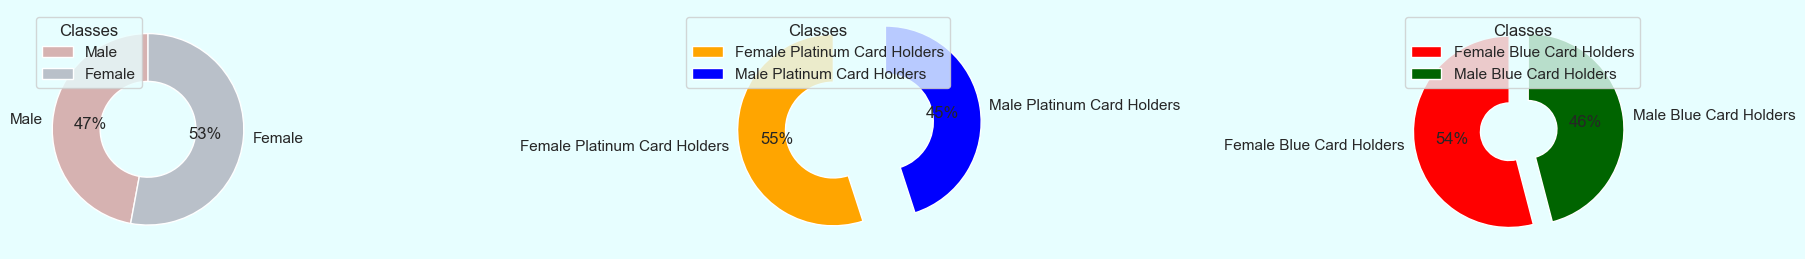

In [137]:

labels1 = ['Male', 'Female']
sizes1 = data.value_counts('Gender')[1],data.value_counts('Gender')[0]

labels2 = ['Female Platinum Card Holders','Male Platinum Card Holders']
sizes2 = data.query('Card_Category=="Platinum"').Gender.value_counts().values

labels3 = ['Female Blue Card Holders','Male Blue Card Holders']
sizes3 = data.query('Card_Category=="Blue"').Gender.value_counts().values

# Create a figure with three subplots in one row
fig, ax = plt.subplots(1,3,figsize=(18,18))
ax1,ax2,ax3=ax.ravel()
# Plot Pie Chart 1
wedges, texts, autotexts =ax1.pie(
    sizes1,
    labels=labels1,
    colors=["#D6B2B1", "#B9C0C9"],
    startangle=90,
    autopct='%.0f%%',
    wedgeprops=dict(width=0.5),
    
)
ax1.legend(wedges, labels1, title="Classes", loc="best")
# Plot Pie Chart 2
wedges, texts, autotexts =ax2.pie(
     sizes2,
    labels=labels2,
    colors=['orange','blue'],
    startangle=90,
    explode=[0.05,0.5],
    autopct='%.0f%%',
    wedgeprops=dict(width=0.5),
    
)
ax2.legend(wedges, labels2, title="Classes",loc="best")
# Plot Pie Chart 3
wedges, texts, autotexts =ax3.pie(
     sizes3,
    labels=labels3,
    colors=['red','darkgreen'],
    startangle=90,
    explode=[0.2,0.0],
    autopct='%.0f%%',
    wedgeprops=dict(width=0.7),
    
)
ax3.legend(wedges, labels3, title="Classes", loc="best")
# Adjust layout to avoid overlapping
plt.tight_layout()
# Display the plot
plt.show()


More samples of females in our dataset are compared to males, but the percentage of difference is not that significant, so we can say that genders are uniformly distributed.


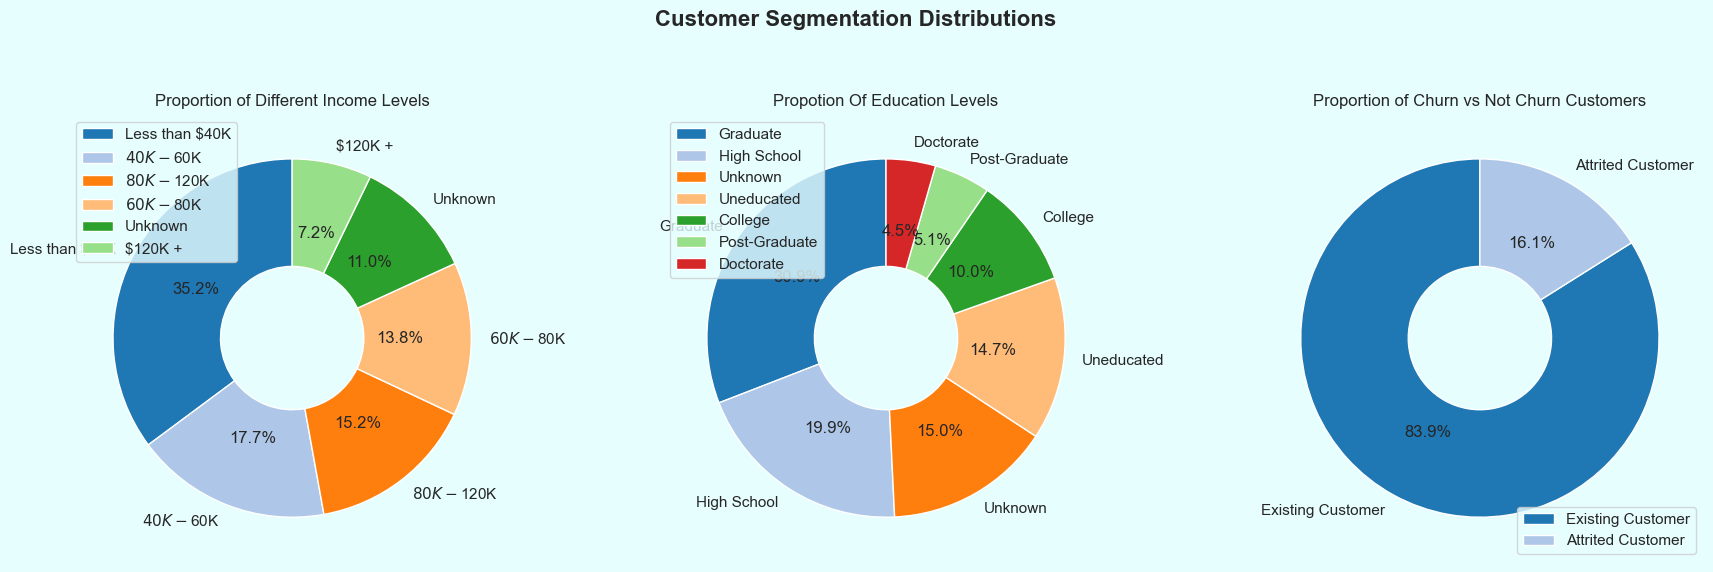

In [138]:

# List of categories to plot and titles
categories = [
    ('Income_Category', 'Proportion of Different Income Levels'),
    ('Education_Level', 'Propotion Of Education Levels'),
    ('Attrition_Flag', 'Proportion of Churn vs Not Churn Customers')
]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Customer Segmentation Distributions", fontsize=16, fontweight='bold')

# Plot each pie chart
for i, (column, title) in enumerate(categories):
    ax = axs[i]
    
    # Get value counts for the column
    counts = data[column].value_counts()
    
    # Colors: optional custom palette or auto
    colors = plt.cm.tab20.colors[:len(counts)]
    
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'width': 0.6},
        colors=colors,
        
    )
    
    ax.set_title(title)
    ax.legend()


plt.tight_layout(rect=[0, 0.03, 1, 0.9])  # leave space for title and legend
plt.show()


If most of the customers with unknown education status lack any education, we can state that more than 70% of the customers have a formal education level. About 35% have a higher level of education.
As we can see, only 16% of the data samples represent churn customers; in the following steps, I will use SMOTE to upsample the churn samples to match them with the regular customer sample size to give the later selected models a better chance of catching on small details which will almost definitely be missed out with such a size difference.

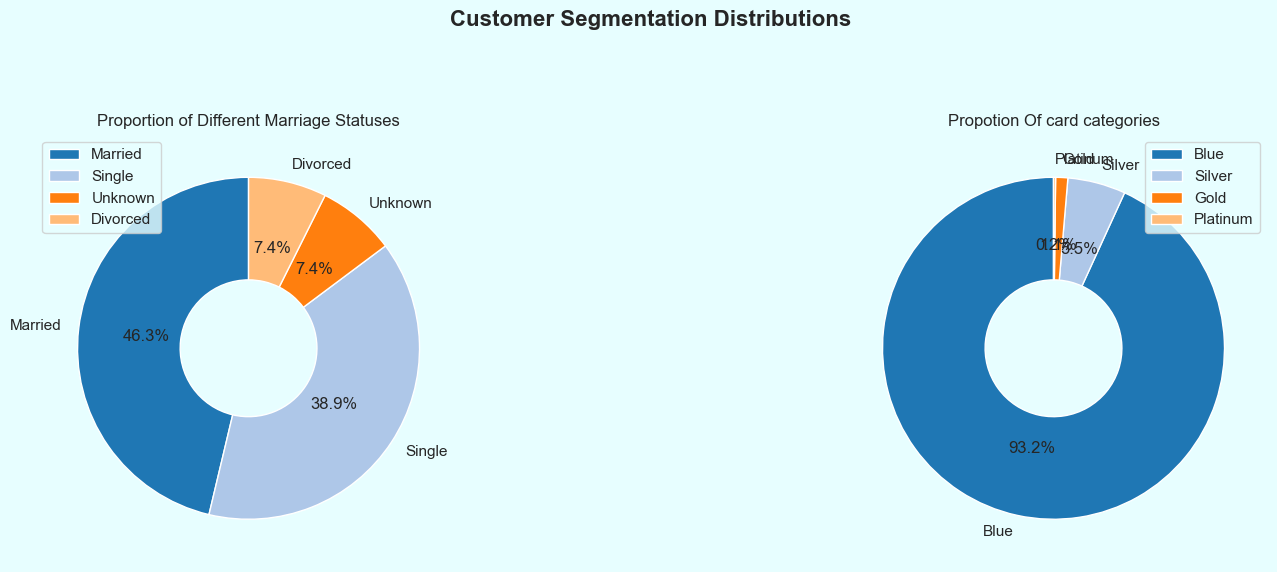

In [139]:

# List of categories to plot and titles
categories = [
    ('Marital_Status', 'Proportion of Different Marriage Statuses'),
    ('Card_Category', 'Propotion Of card categories'),
]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle("Customer Segmentation Distributions", fontsize=16, fontweight='bold')

# Plot each pie chart
for i, (column, title) in enumerate(categories):
    ax = axs[i]
    
    # Get value counts for the column
    counts = data[column].value_counts()
    
    # Colors: optional custom palette or auto
    colors = plt.cm.tab20.colors[:len(counts)]
    
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'width': 0.6},
        colors=colors,
        
    )
    
    ax.set_title(title)
    ax.legend()


plt.tight_layout(rect=[0, 0.03, 1, 0.9])  # leave space for title and legend
plt.show()


Almost half of the bank customers are married, and interestingly enough, almost the entire other half are single customers. only about 7% of the customers are divorced, which is surprising considering the worldwide divorce rate statistics! 

Text(0.5, 1.0, 'Dependent count histogramand kde plot')

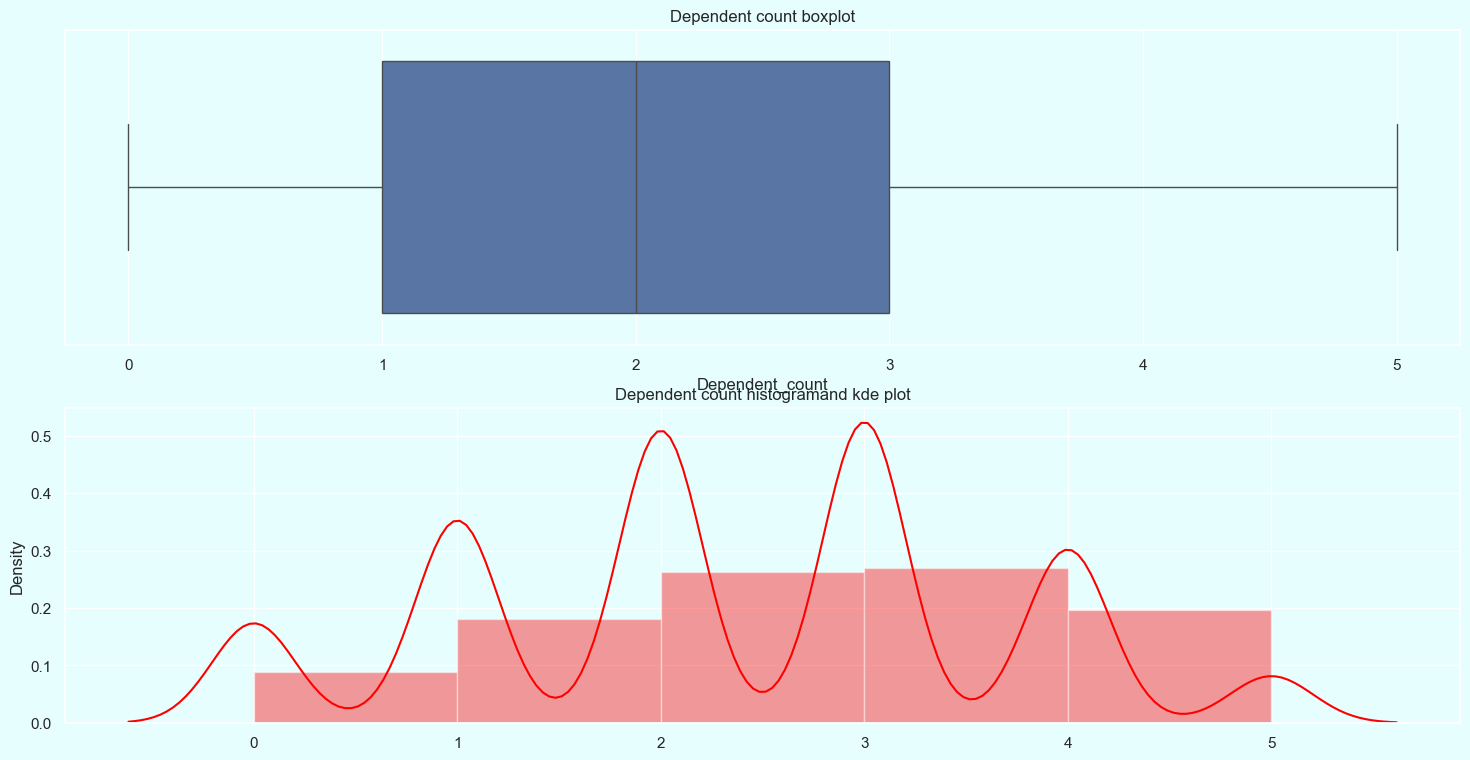

In [140]:
fig,ax = plt.subplots(2, 1,figsize=(18,9))
ax1,ax2=ax.ravel()
sns.boxplot(x=data['Dependent_count'],ax=ax1)
ax1.set_title('Dependent count boxplot')
sns.distplot(x=data['Dependent_count'],color='red',ax=ax2,bins=5)
ax2.set_title('Dependent count histogramand kde plot')



The distribution of Dependent counts is fairly normally distributed with a slight right skew.

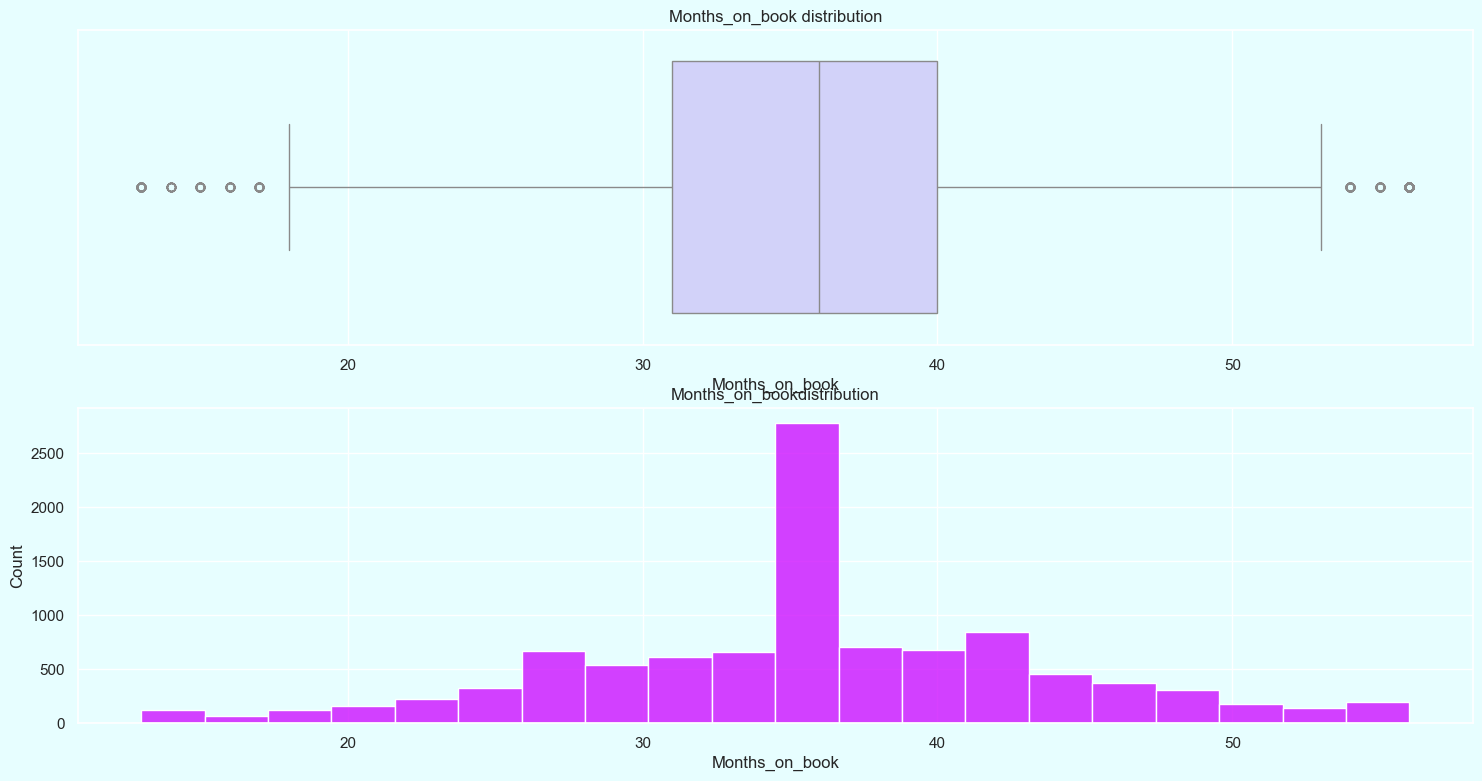

In [141]:
f,ax=plt.subplots(2,1,figsize=(18,9))

ax1,ax2=ax.ravel()
tr1=sns.boxplot(x=data['Months_on_book'],ax=ax1,color='#ccccff')
ax1.set_title('Months_on_book distribution')
tr2=sns.histplot(x=data['Months_on_book'],ax=ax2,color='#cc00ff',bins=20)
ax2.set_title('Months_on_bookdistribution')
plt.grid(True)

Text(0.5, 1.0, 'Distribution of Total no. of products held by the customer')

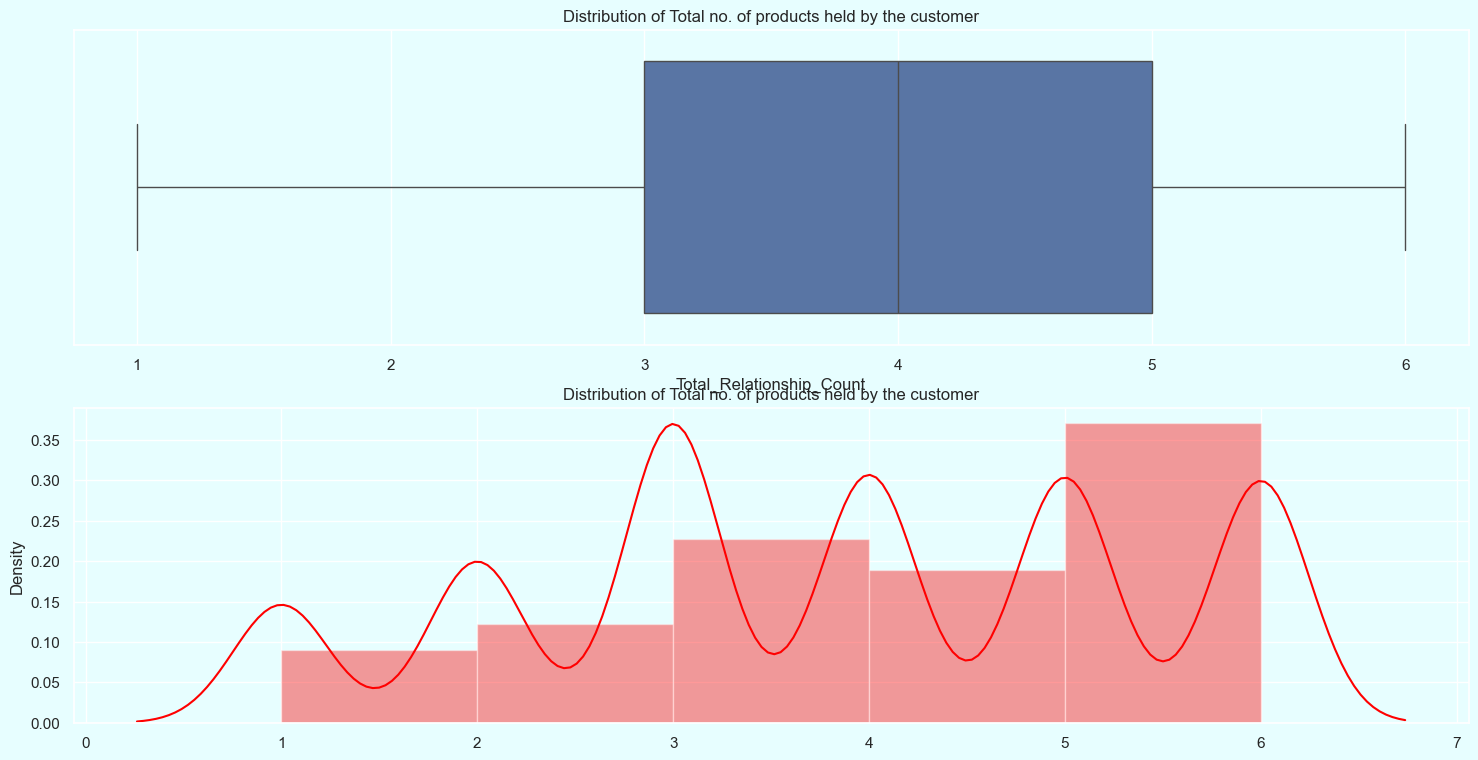

In [142]:
fig,ax = plt.subplots(2, 1,figsize=(18,9))
ax1,ax2=ax.ravel()
sns.boxplot(x=data['Total_Relationship_Count'],ax=ax1)
ax1.set_title('Distribution of Total no. of products held by the customer')
sns.distplot(x=data['Total_Relationship_Count'],color='red',ax=ax2,bins=5)
ax2.set_title('Distribution of Total no. of products held by the customer')



The distribution of the total number of products held by the customer seems closer to a uniform distribution and may appear useless as a predictor for churn status.

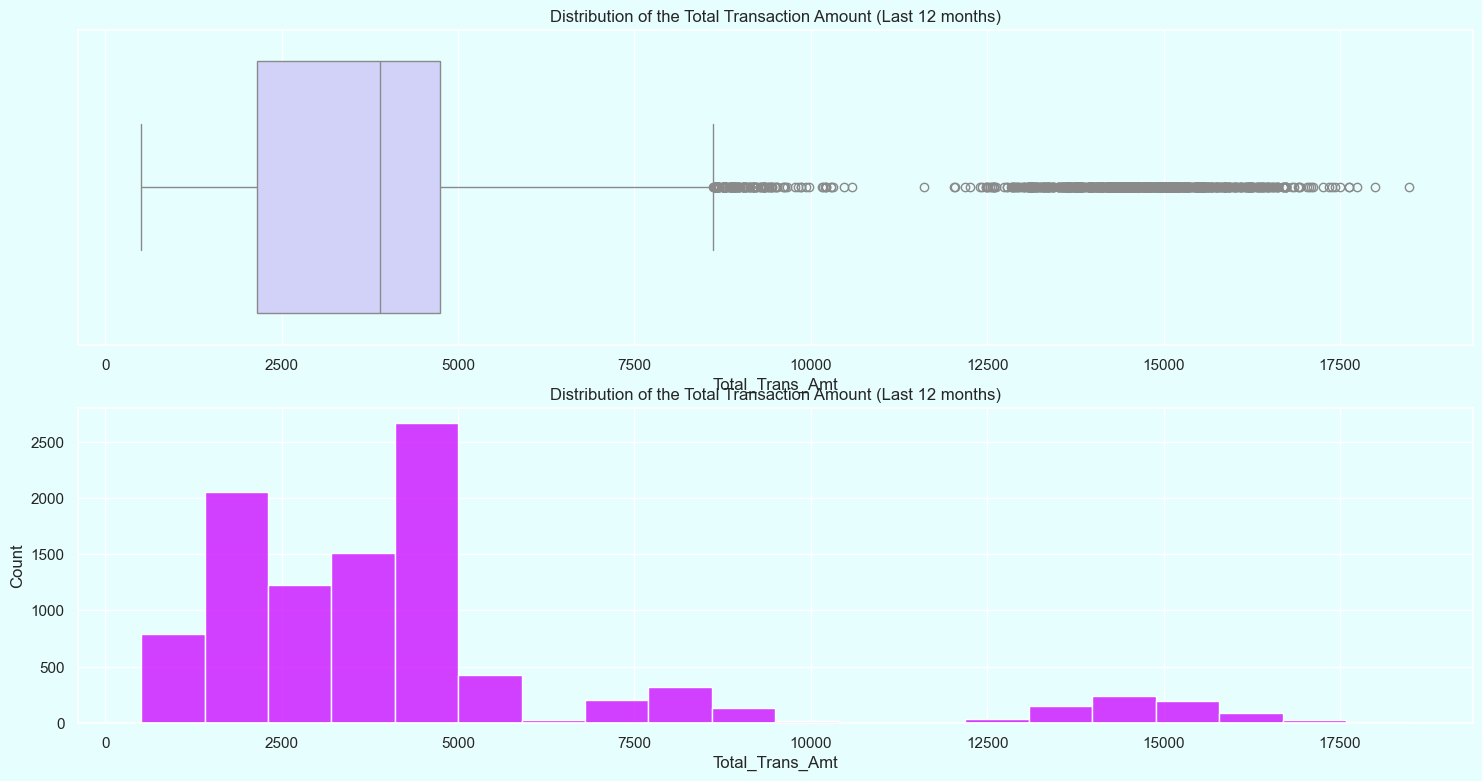

In [143]:
f,ax=plt.subplots(2,1,figsize=(18,9))

ax1,ax2=ax.ravel()
tr1=sns.boxplot(x=data['Total_Trans_Amt'],ax=ax1,color='#ccccff')
ax1.set_title('Distribution of the Total Transaction Amount (Last 12 months)')
tr2=sns.histplot(x=data['Total_Trans_Amt'],ax=ax2,color='#cc00ff',bins=20)
ax2.set_title('Distribution of the Total Transaction Amount (Last 12 months)')
plt.grid(True)

We see that the distribution of the total transactions (Last 12 months) displays a multimodal distribution, meaning we have some underlying groups in our data; it can be an interesting experiment to try and cluster the different groups and view the similarities between them and what describes best the different groups which create the different modes in our distribution.

<a id="3"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Data Preprocessing</h1>


In [144]:
data.Attrition_Flag = data.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
data.Gender = data.Gender.replace({'F':1,'M':0})
data = pd.concat([data,pd.get_dummies(data['Education_Level']).drop(columns=['Unknown'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Income_Category']).drop(columns=['Unknown'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Marital_Status']).drop(columns=['Unknown'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Card_Category']).drop(columns=['Platinum'])],axis=1)
data.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','CLIENTNUM'],inplace=True)

<li>here we do label encoding of categorical columns Gender and Attrition_Flag</li>
<li>we have to do one hot encoding of education level ,income category,martial status,card category as all values of category are equally important.</li>
here to remove the  dependency inbetween the column after one hot encoding we are removing the values such as unknown,platinum in these categories. because unknown in columns educatin level, martial status,income category dont give any information about data. and platinum is very few in card caegory. nd we dont lose any importnt information.

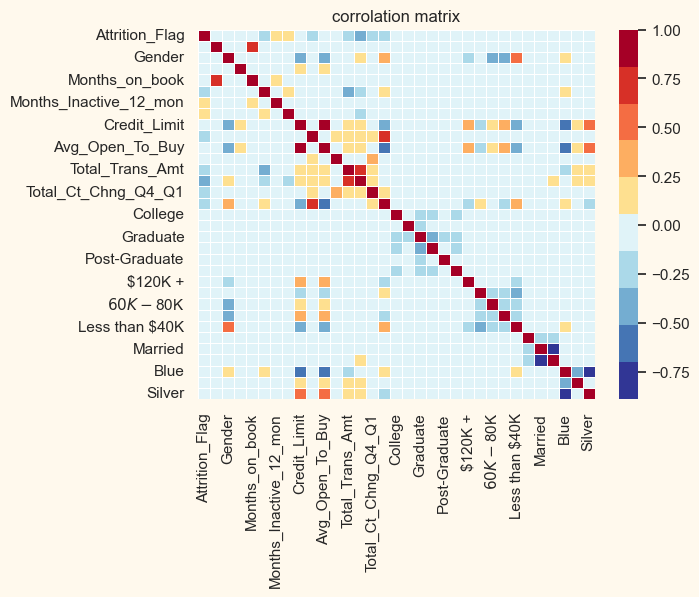

In [145]:
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
corrmap=data.corr()
col= ListedColormap(['#313695', '#4575B4', '#74ADD1', '#ABD9E9','#E0F3F8', '#FEE090', '#FDAE61', '#F46D43','#D73027', '#A50026'])
sns.heatmap(corrmap, cmap=col, linewidths=0.5)
plt.title("corrolation matrix")
plt.show()

<a id="3.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Data Upsampling Using SMOTE</h3>


**SMOTE** (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [146]:
oversample = SMOTE()
X, y = oversample.fit_resample(data[data.columns[1:]], data[data.columns[0]])
usampled_df = X.assign(Churn = y)

In [147]:
ohe_data =usampled_df[usampled_df.columns[15:-1]].copy()
usampled_df = usampled_df.drop(columns=usampled_df.columns[15:-1])

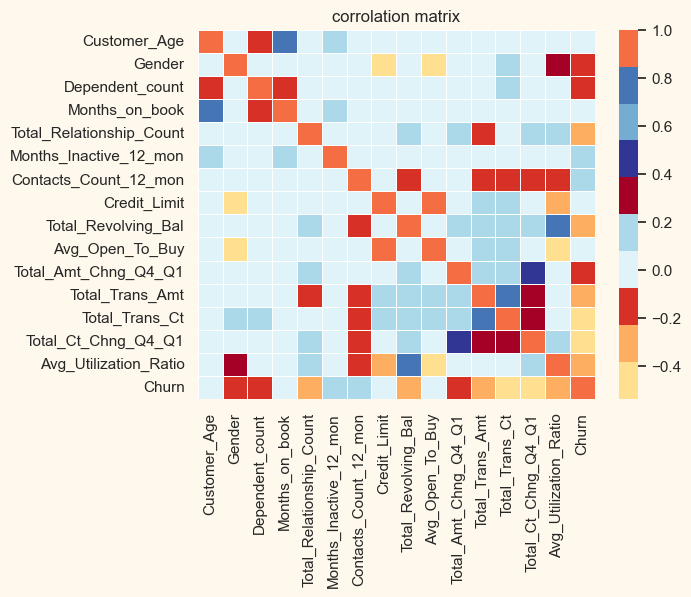

In [148]:
corrmap=usampled_df.corr()
col= ListedColormap(["#FEE090","#FDAE61","#D73027","#E0F3F8", "#ABD9E9","#A50026", "#313695", "#74ADD1", "#4575B4", "#F46D43"])
sns.heatmap(corrmap, cmap=col, linewidths=0.5)
plt.title("corrolation matrix")
plt.show()

<a id="3.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Principal Component Analysis Of One Hot Encoded Data </h3>


We will use principal component analysis to reduce the dimensionality of the one-hot encoded categorical variables losing some of the variances, but simultaneously, using a couple of principal components instead of tens of one-hot encoded features will help me construct a better model.

In [149]:
N_COMPONENTS = 4
pca_model = PCA(n_components = N_COMPONENTS )
pc_matrix = pca_model.fit_transform(ohe_data)

In [150]:
usampled_df_with_pcs = pd.concat([usampled_df,pd.DataFrame(pc_matrix,columns=['PC-{}'.format(i) for i in range(0,N_COMPONENTS)])],axis=1)

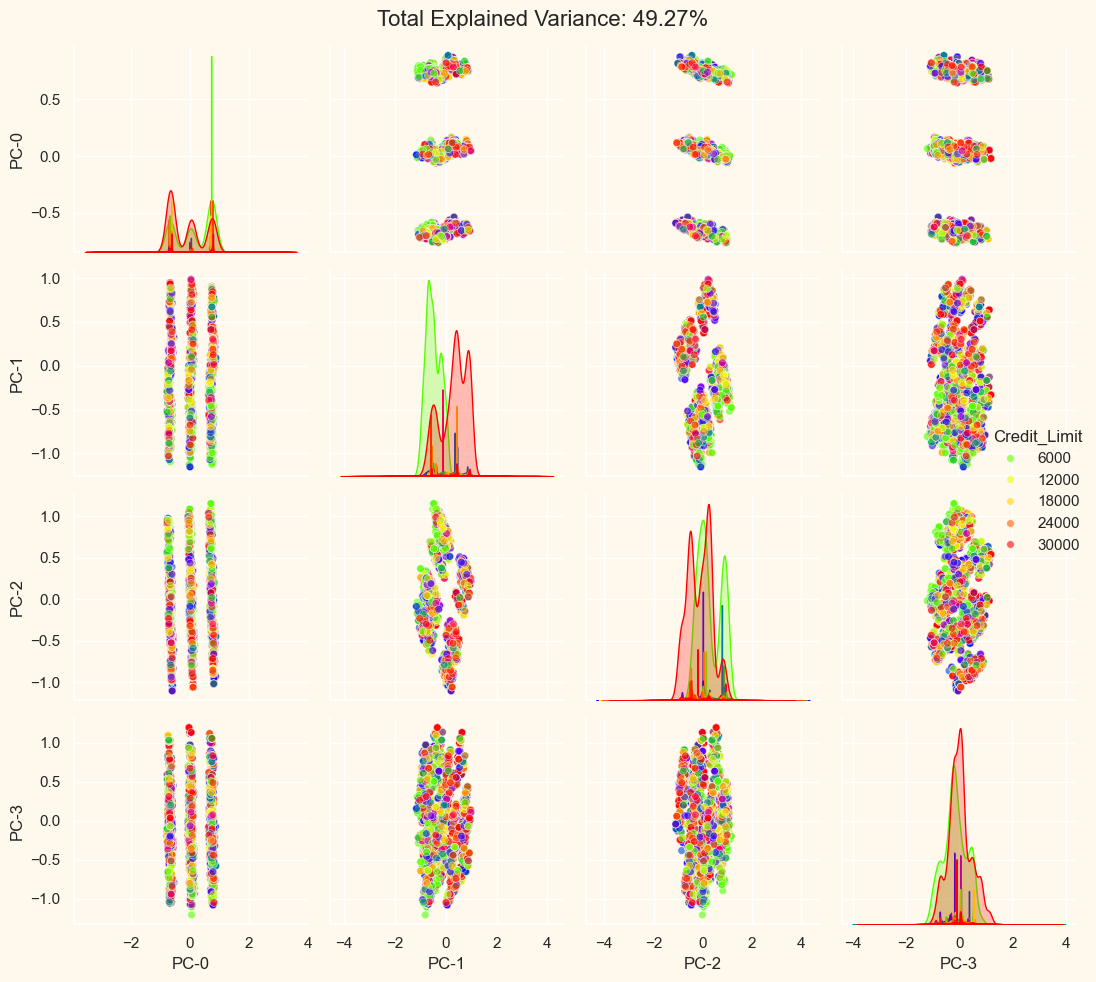

In [151]:

# Prepare the PCA dataframe
pca_cols = ['PC-{}'.format(i) for i in range(N_COMPONENTS)]
evr = pca_model.explained_variance_ratio_
total_var = evr.sum() * 100
sns.pairplot(
    usampled_df_with_pcs,
    hue='Credit_Limit',
    vars=pca_cols,
    palette='prism',         # or use your preferred palette
    plot_kws={'alpha': 0.6, 's': 30},  # control transparency and marker size
                   
)

plt.suptitle(f"Total Explained Variance: {total_var:.2f}%", fontsize=16)
plt.tight_layout()
plt.show()


<a id="4"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Model Selection And Evaluation</h1>

In [152]:
X_features = ['Total_Trans_Ct','PC-3','PC-1','PC-0','PC-2','Total_Ct_Chng_Q4_Q1','Total_Relationship_Count']

X = usampled_df_with_pcs[X_features]
y = usampled_df_with_pcs['Churn']

In [153]:
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42)

In [154]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## KNN

In [155]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.8809411764705882


In [156]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2131
           1       0.90      0.86      0.88      2119

    accuracy                           0.88      4250
   macro avg       0.88      0.88      0.88      4250
weighted avg       0.88      0.88      0.88      4250



## svc

In [157]:
svc_model = SVC(random_state = 1,probability=True)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8797647058823529


In [158]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2131
           1       0.88      0.87      0.88      2119

    accuracy                           0.88      4250
   macro avg       0.88      0.88      0.88      4250
weighted avg       0.88      0.88      0.88      4250



## Random Forest

In [159]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = 1000,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8696470588235294


In [160]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2131
           1       0.87      0.87      0.87      2119

    accuracy                           0.87      4250
   macro avg       0.87      0.87      0.87      4250
weighted avg       0.87      0.87      0.87      4250



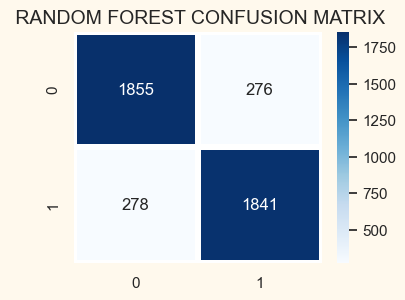

In [161]:


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",cmap="Blues",linewidths=3)


plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

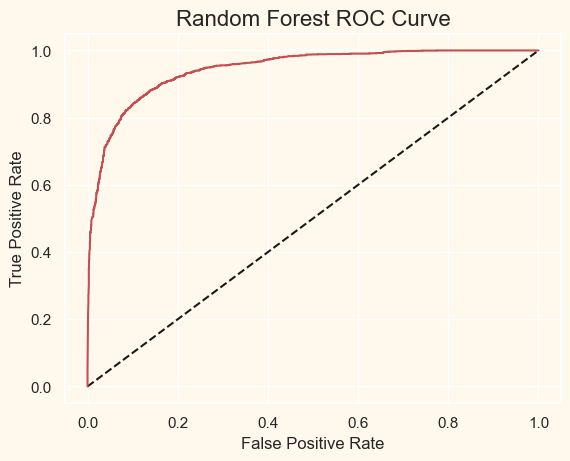

In [162]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

## Logestic Regression

In [163]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.832


In [164]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2131
           1       0.83      0.83      0.83      2119

    accuracy                           0.83      4250
   macro avg       0.83      0.83      0.83      4250
weighted avg       0.83      0.83      0.83      4250



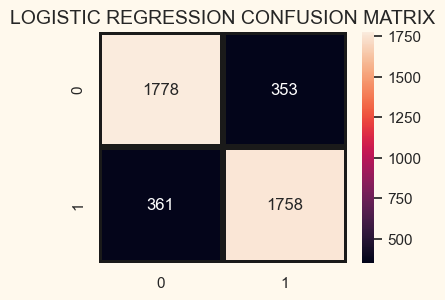

In [165]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

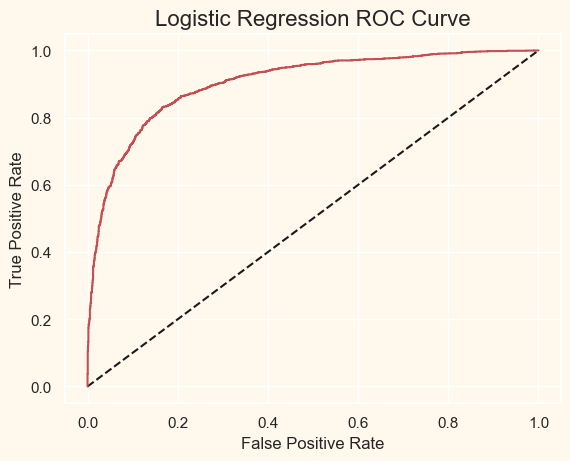

In [166]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

<a id="5"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Results</h1>


## VOTING CLASSIFIER

Let's now predict the final model based on the highest majority of voting and check it's score.

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1=svc_model
clf2 = lr_model
clf3 = model_rf 
clf4=knn_model
eclf1 = VotingClassifier(estimators=[('svc',clf1),('lr', clf2),('raforest',clf3),('knn',clf4)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(metrics.accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8767058823529412


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2131
           1       0.88      0.87      0.88      2119

    accuracy                           0.88      4250
   macro avg       0.88      0.88      0.88      4250
weighted avg       0.88      0.88      0.88      4250



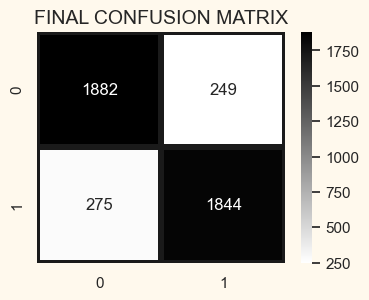

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",cmap='binary',linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

.

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.

<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">END</h1>

<center><img src="thank.jpg" style="border: 5px solid black; width:1000px;height:400px;" /></center>
